In [67]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [2]:
#Large Cap
nabil_url = "https://sharehubnepal.com/data/api/v1/candle-chart/history?symbol=NABIL&resolution=1D&countback=0&isAdjust=true"
gbime_url = "https://sharehubnepal.com/data/api/v1/candle-chart/history?symbol=GBIME&resolution=1D&countback=0&isAdjust=true"
rbcl_url = "https://sharehubnepal.com/data/api/v1/candle-chart/history?symbol=GBIME&resolution=1D&countback=0&isAdjust=true"

In [3]:
#Mid Cap
mbl_url = "https://sharehubnepal.com/data/api/v1/candle-chart/history?symbol=MBL&resolution=1D&countback=0&isAdjust=true"
shine_url = "https://sharehubnepal.com/data/api/v1/candle-chart/history?symbol=SHINE&resolution=1D&countback=0&isAdjust=true"
lbbl_url = "https://sharehubnepal.com/data/api/v1/candle-chart/history?symbol=LBBL&resolution=1D&countback=0&isAdjust=true"

In [4]:
#Small Cap
jfl_url = "https://sharehubnepal.com/data/api/v1/candle-chart/history?symbol=JFL&resolution=1D&countback=0&isAdjust=true"
mpfl_url = "https://sharehubnepal.com/data/api/v1/candle-chart/history?symbol=MPFL&resolution=1D&countback=0&isAdjust=true"
ehpl_url = "https://sharehubnepal.com/data/api/v1/candle-chart/history?symbol=EHPL&resolution=1D&countback=0&isAdjust=true"

In [31]:
# Importing Data
nabil_response = requests.get(nabil_url)
if nabil_response.status_code == 200:
    nabil_data = nabil_response.json()
    
gbime_response = requests.get(gbime_url)
if gbime_response.status_code == 200:
    gbime_data = gbime_response.json()

rbcl_response = requests.get(rbcl_url)
if rbcl_response.status_code == 200:
    rbcl_data = rbcl_response.json()

mbl_response = requests.get(mbl_url)
if mbl_response.status_code == 200:
    mbl_data = mbl_response.json()

shine_response = requests.get(shine_url)
if shine_response.status_code == 200:
    shine_data = shine_response.json()

lbbl_response = requests.get(lbbl_url)
if lbbl_response.status_code == 200:
    lbbl_data = lbbl_response.json()

jfl_response = requests.get(jfl_url)
if jfl_response.status_code == 200:
    jfl_data = jfl_response.json()

mpfl_response = requests.get(mpfl_url)
if mpfl_response.status_code == 200:
    mpfl_data = mpfl_response.json()

ehpl_response = requests.get(ehpl_url)
if ehpl_response.status_code == 200:
    ehpl_data = ehpl_response.json()

In [32]:
# Normalize the 'data' field inside the JSON
nabil_data_expanded = pd.json_normalize(nabil_data['data'])

gbime_data_expanded = pd.json_normalize(gbime_data['data'])

rbcl_data_expanded = pd.json_normalize(rbcl_data['data'])

mbl_data_expanded = pd.json_normalize(mbl_data['data'])

shine_data_expanded = pd.json_normalize(shine_data['data'])

lbbl_data_expanded = pd.json_normalize(lbbl_data['data'])

jfl_data_expanded = pd.json_normalize(jfl_data['data'])

mpfl_data_expanded = pd.json_normalize(mpfl_data['data'])

ehpl_data_expanded = pd.json_normalize(ehpl_data['data'])

In [41]:
# Convert time (milliseconds to datetime)
nabil_data_expanded['time'] = pd.to_datetime(nabil_data_expanded['time'], unit='ms')

gbime_data_expanded['time'] = pd.to_datetime(gbime_data_expanded['time'], unit='ms')

rbcl_data_expanded['time'] = pd.to_datetime(rbcl_data_expanded['time'], unit='ms')

mbl_data_expanded['time'] = pd.to_datetime(mbl_data_expanded['time'], unit='ms')

shine_data_expanded['time'] = pd.to_datetime(shine_data_expanded['time'], unit='ms')

lbbl_data_expanded['time'] = pd.to_datetime(lbbl_data_expanded['time'], unit='ms')

jfl_data_expanded['time'] = pd.to_datetime(jfl_data_expanded['time'], unit='ms')

mpfl_data_expanded['time'] = pd.to_datetime(mpfl_data_expanded['time'], unit='ms')

ehpl_data_expanded['time'] = pd.to_datetime(ehpl_data_expanded['time'], unit='ms')

In [43]:
# Sort by time
nabil_data_expanded = nabil_data_expanded.sort_values('time').reset_index(drop=True)

gbime_data_expanded = gbime_data_expanded.sort_values('time').reset_index(drop=True)

rbcl_data_expanded = rbcl_data_expanded.sort_values('time').reset_index(drop=True)

mbl_data_expanded = mbl_data_expanded.sort_values('time').reset_index(drop=True)

shine_data_expanded = shine_data_expanded.sort_values('time').reset_index(drop=True)

lbbl_data_expanded = lbbl_data_expanded.sort_values('time').reset_index(drop=True)

jfl_data_expanded = jfl_data_expanded.sort_values('time').reset_index(drop=True)

mpfl_data_expanded = mpfl_data_expanded.sort_values('time').reset_index(drop=True)

ehpl_data_expanded = ehpl_data_expanded.sort_values('time').reset_index(drop=True)

In [44]:
# Drop the first 15 days (rows)
nabil = nabil_data_expanded.iloc[15:].reset_index(drop=True)

gbime = gbime_data_expanded.iloc[15:].reset_index(drop=True)

rbcl = rbcl_data_expanded.iloc[15:].reset_index(drop=True)

mbl = mbl_data_expanded.iloc[15:].reset_index(drop=True)

shine = shine_data_expanded.iloc[15:].reset_index(drop=True)

lbbl = lbbl_data_expanded.iloc[15:].reset_index(drop=True)

jfl = jfl_data_expanded.iloc[15:].reset_index(drop=True)

mpfl = mpfl_data_expanded.iloc[15:].reset_index(drop=True)

ehpl = ehpl_data_expanded.iloc[15:].reset_index(drop=True)

In [28]:
nabil

,time,symbol,open,close,high,low,volume
0,2012-01-25,NABIL,79.64,80.12,80.12,78.69,442
1,2012-01-26,NABIL,80.12,79.17,79.17,78.78,408
2,2012-01-29,NABIL,79.17,79.17,79.17,78.50,496
3,2012-01-31,NABIL,79.17,80.31,80.60,80.31,143
4,2012-02-01,NABIL,80.31,79.36,80.12,79.36,250
...,...,...,...,...,...,...,...
3096,2025-08-18,NABIL,520.00,518.95,524.00,517.00,48703
3097,2025-08-19,NABIL,525.00,518.81,525.00,518.00,44459
3098,2025-08-20,NABIL,518.00,518.81,521.00,517.00,43704
3099,2025-08-21,NABIL,524.90,518.14,524.90,517.30,38427


In [45]:
gbime

,time,symbol,open,close,high,low,volume
0,2012-09-30,GBIME,60.51,60.26,61.00,58.78,7236
1,2012-10-01,GBIME,60.26,60.01,60.51,59.27,5064
2,2012-10-02,GBIME,60.01,61.25,61.25,59.77,2854
3,2012-10-03,GBIME,61.25,61.25,61.99,60.26,3424
4,2012-10-04,GBIME,61.25,61.74,61.74,60.26,3162
...,...,...,...,...,...,...,...
2503,2025-08-18,GBIME,249.00,250.66,251.80,248.00,159474
2504,2025-08-19,GBIME,251.10,252.04,252.90,249.00,110650
2505,2025-08-20,GBIME,250.60,250.66,253.20,250.00,97873
2506,2025-08-21,GBIME,252.00,252.01,253.00,248.00,135321


In [46]:
rbcl

,time,symbol,open,close,high,low,volume
0,2012-09-30,GBIME,60.51,60.26,61.00,58.78,7236
1,2012-10-01,GBIME,60.26,60.01,60.51,59.27,5064
2,2012-10-02,GBIME,60.01,61.25,61.25,59.77,2854
3,2012-10-03,GBIME,61.25,61.25,61.99,60.26,3424
4,2012-10-04,GBIME,61.25,61.74,61.74,60.26,3162
...,...,...,...,...,...,...,...
2503,2025-08-18,GBIME,249.00,250.66,251.80,248.00,159474
2504,2025-08-19,GBIME,251.10,252.04,252.90,249.00,110650
2505,2025-08-20,GBIME,250.60,250.66,253.20,250.00,97873
2506,2025-08-21,GBIME,252.00,252.01,253.00,248.00,135321


In [47]:
mbl

,time,symbol,open,close,high,low,volume
0,2012-10-11,MBL,57.15,57.96,58.16,57.15,13811
1,2012-10-14,MBL,57.96,60.37,60.37,57.36,11944
2,2012-10-15,MBL,60.37,60.77,61.18,59.37,10712
3,2012-10-17,MBL,60.77,63.59,63.79,60.37,9818
4,2012-10-18,MBL,63.59,65.60,65.60,63.59,13045
...,...,...,...,...,...,...,...
2741,2025-08-18,MBL,251.00,250.67,256.00,244.20,84241
2742,2025-08-19,MBL,248.00,248.07,252.50,245.90,71549
2743,2025-08-20,MBL,249.90,249.75,252.00,247.10,83233
2744,2025-08-21,MBL,249.75,247.29,250.90,244.80,85594


In [48]:
shine

,time,symbol,open,close,high,low,volume
0,2013-09-19,SHINE,29.54,28.97,29.54,28.97,577
1,2013-09-22,SHINE,28.97,29.54,29.88,29.20,2369
2,2013-09-23,SHINE,29.54,29.31,29.31,28.74,617
3,2013-09-24,SHINE,29.31,29.65,29.65,29.08,726
4,2013-09-25,SHINE,29.65,29.31,29.43,29.08,828
...,...,...,...,...,...,...,...
2426,2025-08-18,SHINE,429.10,431.44,435.50,428.20,50475
2427,2025-08-19,SHINE,426.00,432.55,439.00,426.00,19376
2428,2025-08-20,SHINE,434.10,431.05,434.10,428.20,41992
2429,2025-08-21,SHINE,431.05,425.75,431.05,425.20,21451


In [49]:
lbbl

,time,symbol,open,close,high,low,volume
0,2017-08-17,LBBL,118.08,123.63,123.63,118.08,12938
1,2017-08-20,LBBL,123.07,120.85,123.63,119.19,6669
2,2017-08-21,LBBL,120.30,120.30,121.96,118.64,6370
3,2017-08-22,LBBL,120.30,120.30,122.52,119.19,4885
4,2017-08-23,LBBL,120.30,120.30,121.96,118.08,12790
...,...,...,...,...,...,...,...
1831,2025-08-18,LBBL,539.00,538.75,548.20,531.00,161987
1832,2025-08-19,LBBL,548.00,535.40,551.80,534.00,116308
1833,2025-08-20,LBBL,544.00,535.77,546.90,532.10,113713
1834,2025-08-21,LBBL,531.80,535.41,545.00,531.80,95376


In [50]:
jfl

,time,symbol,open,close,high,low,volume
0,2012-03-12,JFL,28.95,28.52,28.81,28.52,359
1,2012-03-13,JFL,28.52,28.10,28.10,28.10,200
2,2012-03-14,JFL,28.10,28.24,28.52,28.24,207
3,2012-03-18,JFL,28.24,28.81,28.81,28.81,1000
4,2012-03-27,JFL,28.81,28.10,28.24,28.10,1750
...,...,...,...,...,...,...,...
2642,2025-08-18,JFL,477.00,477.21,479.50,471.20,14750
2643,2025-08-19,JFL,478.00,475.31,480.00,471.10,11179
2644,2025-08-20,JFL,476.00,470.05,479.10,469.00,17249
2645,2025-08-21,JFL,470.00,468.78,475.00,466.10,10365


In [51]:
mpfl

,time,symbol,open,close,high,low,volume
0,2012-09-24,MPFL,94.92,94.39,94.74,94.39,50
1,2012-09-30,MPFL,94.39,93.44,93.91,93.44,80
2,2012-10-07,MPFL,93.44,92.61,93.02,92.61,100
3,2012-10-08,MPFL,92.61,92.37,92.49,92.37,30
4,2012-10-09,MPFL,92.37,91.89,92.01,91.89,40
...,...,...,...,...,...,...,...
1802,2025-08-18,MPFL,604.00,605.76,613.90,602.00,13111
1803,2025-08-19,MPFL,606.00,607.44,613.00,605.80,6510
1804,2025-08-20,MPFL,605.00,601.01,610.00,600.00,9170
1805,2025-08-21,MPFL,601.00,596.27,609.80,595.00,10182


In [52]:
ehpl

,time,symbol,open,close,high,low,volume
0,2023-01-05,EHPL,366.6,411.00,411.4,352.2,7940
1,2023-01-08,EHPL,402.8,418.90,440.0,379.3,9461
2,2023-01-09,EHPL,410.6,423.00,423.0,400.0,9039
3,2023-01-10,EHPL,430.0,424.00,431.2,388.0,10210
4,2023-01-12,EHPL,416.0,404.00,416.0,393.4,11292
...,...,...,...,...,...,...,...
603,2025-08-18,EHPL,580.0,587.85,590.0,570.2,2971
604,2025-08-19,EHPL,599.0,614.75,620.9,599.0,6346
605,2025-08-20,EHPL,624.9,604.91,625.5,603.0,872
606,2025-08-21,EHPL,593.2,601.55,616.0,593.2,5742


In [56]:
#Data Setup
nabil['close'] = pd.to_numeric(nabil['close'], errors='coerce')
nabil_close = nabil['close'].dropna().to_numpy()

gbime['close'] = pd.to_numeric(gbime['close'], errors='coerce')
gbime_close = gbime['close'].dropna().to_numpy()

rbcl['close'] = pd.to_numeric(rbcl['close'], errors='coerce')
rbcl_close = rbcl['close'].dropna().to_numpy()

mbl['close'] = pd.to_numeric(mbl['close'], errors='coerce')
mbl_close = mbl['close'].dropna().to_numpy()

shine['close'] = pd.to_numeric(shine['close'], errors='coerce')
shine_close = shine['close'].dropna().to_numpy()

lbbl['close'] = pd.to_numeric(lbbl['close'], errors='coerce')
lbbl_close = lbbl['close'].dropna().to_numpy()

jfl['close'] = pd.to_numeric(jfl['close'], errors='coerce')
jfl_close = jfl['close'].dropna().to_numpy()

mpfl['close'] = pd.to_numeric(mpfl['close'], errors='coerce')
mpfl_close = mpfl['close'].dropna().to_numpy()

ehpl['close'] = pd.to_numeric(ehpl['close'], errors='coerce')
ehpl_close = ehpl['close'].dropna().to_numpy()

Text(0.5, 1.0, 'NABIL Stock Closing Prices Over Time')

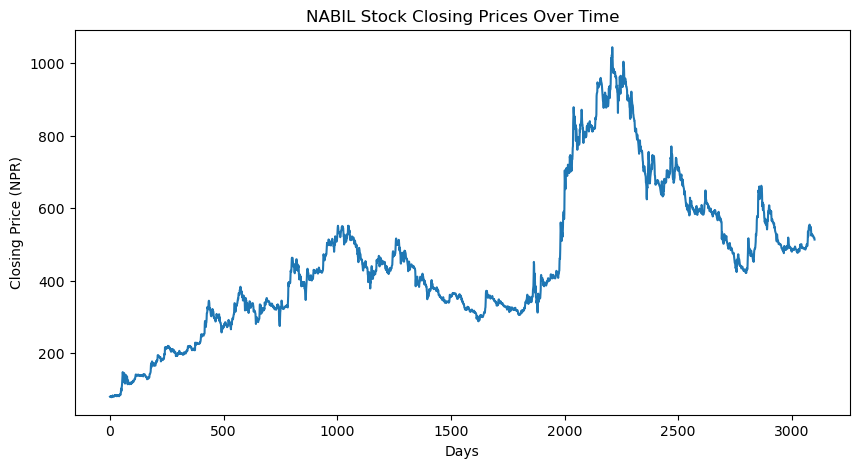

In [57]:
#Data Plot (Nabil)
plt.figure(figsize=(10,5))
plt.plot(nabil_close)
plt.xlabel('Days')
plt.ylabel('Closing Price (NPR)')
plt.title('NABIL Stock Closing Prices Over Time')

Text(0.5, 1.0, 'GBIME Stock Closing Prices Over Time')

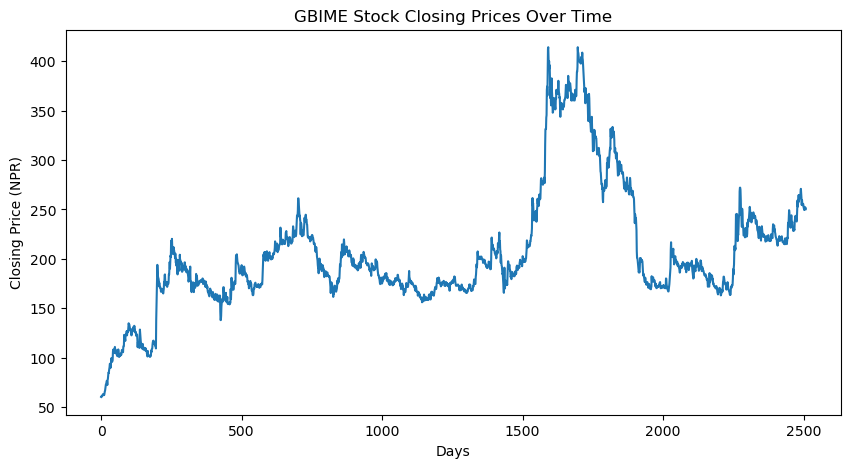

In [58]:
#Data Plot (Gbime)
plt.figure(figsize=(10,5))
plt.plot(gbime_close)
plt.xlabel('Days')
plt.ylabel('Closing Price (NPR)')
plt.title('GBIME Stock Closing Prices Over Time')

Text(0.5, 1.0, 'RBCL Stock Closing Prices Over Time')

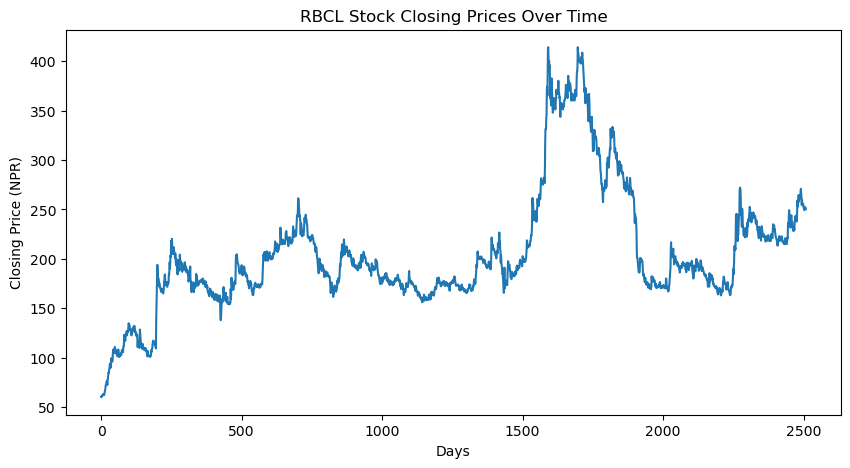

In [59]:
#Data Plot (RBCL)
plt.figure(figsize=(10,5))
plt.plot(rbcl_close)
plt.xlabel('Days')
plt.ylabel('Closing Price (NPR)')
plt.title('RBCL Stock Closing Prices Over Time')

Text(0.5, 1.0, 'MBL Stock Closing Prices Over Time')

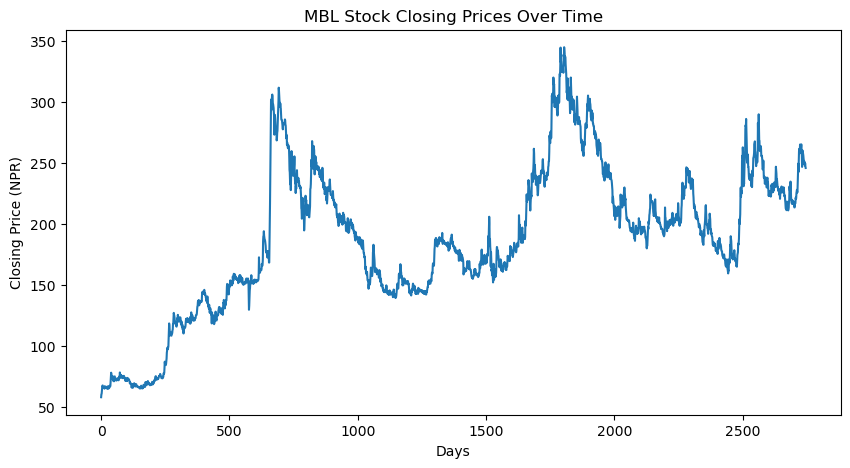

In [60]:
#Data Plot (MBL)
plt.figure(figsize=(10,5))
plt.plot(mbl_close)
plt.xlabel('Days')
plt.ylabel('Closing Price (NPR)')
plt.title('MBL Stock Closing Prices Over Time')

Text(0.5, 1.0, 'SHINE Stock Closing Prices Over Time')

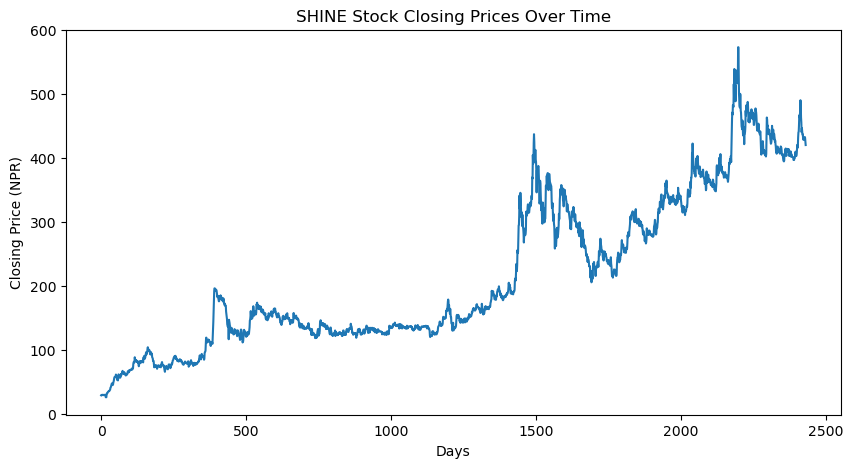

In [61]:
#Data Plot (SHINE)
plt.figure(figsize=(10,5))
plt.plot(shine_close)
plt.xlabel('Days')
plt.ylabel('Closing Price (NPR)')
plt.title('SHINE Stock Closing Prices Over Time')

Text(0.5, 1.0, 'LBBL Stock Closing Prices Over Time')

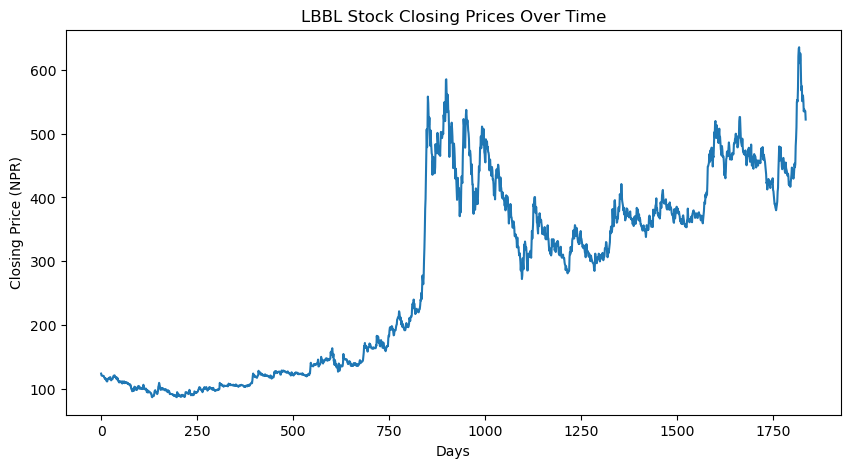

In [62]:
#Data Plot (LBBL)
plt.figure(figsize=(10,5))
plt.plot(lbbl_close)
plt.xlabel('Days')
plt.ylabel('Closing Price (NPR)')
plt.title('LBBL Stock Closing Prices Over Time')

Text(0.5, 1.0, 'JFL Stock Closing Prices Over Time')

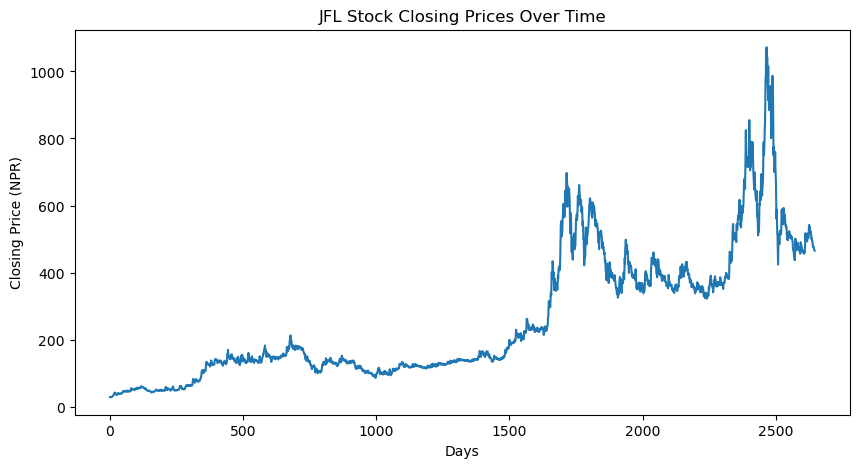

In [63]:
#Data Plot (JFL)
plt.figure(figsize=(10,5))
plt.plot(jfl_close)
plt.xlabel('Days')
plt.ylabel('Closing Price (NPR)')
plt.title('JFL Stock Closing Prices Over Time')

Text(0.5, 1.0, 'MPFL Stock Closing Prices Over Time')

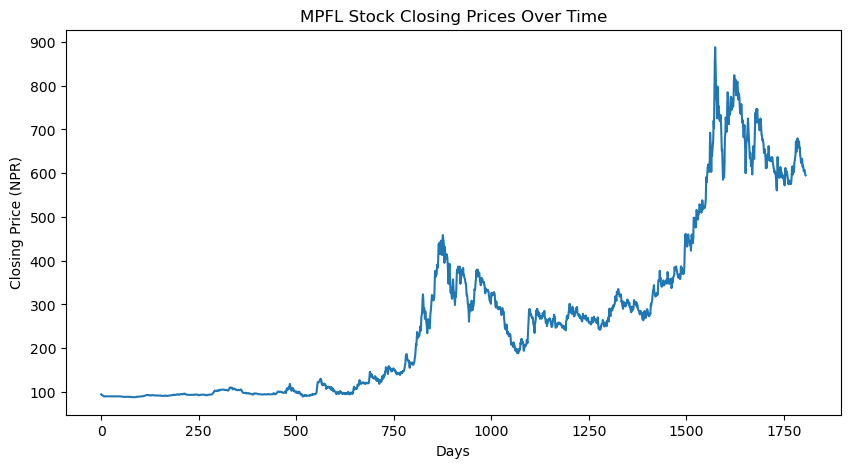

In [64]:
#Data Plot (MPFL)
plt.figure(figsize=(10,5))
plt.plot(mpfl_close)
plt.xlabel('Days')
plt.ylabel('Closing Price (NPR)')
plt.title('MPFL Stock Closing Prices Over Time')

Text(0.5, 1.0, 'EHPL Stock Closing Prices Over Time')

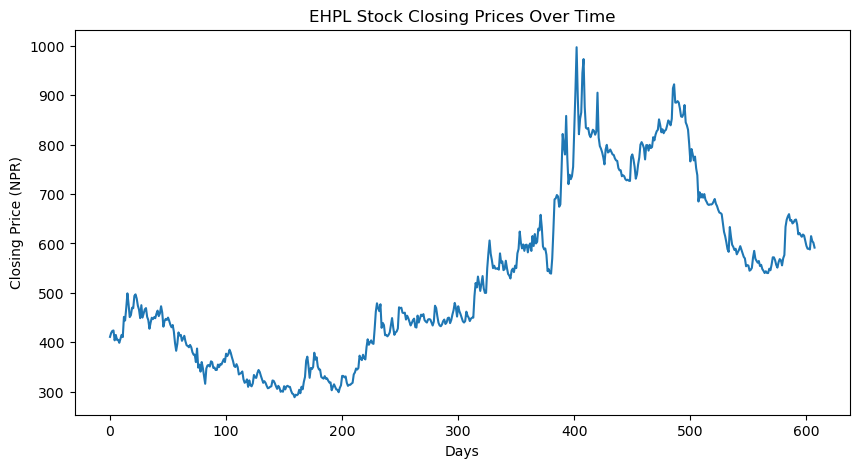

In [65]:
#Data Plot (EHPL)
plt.figure(figsize=(10,5))
plt.plot(ehpl_close)
plt.xlabel('Days')
plt.ylabel('Closing Price (NPR)')
plt.title('EHPL Stock Closing Prices Over Time')

In [69]:
#ADF TEST 
nabil_result = adfuller(nabil_close)

gbime_result = adfuller(gbime_close)

rbcl_result = adfuller(rbcl_close)

mbl_result = adfuller(mbl_close)

shine_result = adfuller(shine_close)

lbbl_result = adfuller(lbbl_close)

jfl_result = adfuller(jfl_close)

mpfl_result = adfuller(mpfl_close)

ehpl_result = adfuller(ehpl_close)

In [71]:
results = [
    {
        'Symbol': "NABIL",
        'ADF Statistic': nabil_result[0],
        'p-value': nabil_result[1],
        'Lags Used': nabil_result[2],
        'Observations': nabil_result[3],
        'Stationary': "Yes" if nabil_result[1] < 0.05 else "No"
    },
    {
        'Symbol': "GBIME",
        'ADF Statistic': gbime_result[0],
        'p-value': gbime_result[1],
        'Lags Used': gbime_result[2],
        'Observations': gbime_result[3],
        'Stationary': "Yes" if gbime_result[1] < 0.05 else "No"
    },
    {
        'Symbol': "RBCL",
        'ADF Statistic': rbcl_result[0],
        'p-value': rbcl_result[1],
        'Lags Used': rbcl_result[2],
        'Observations': rbcl_result[3],
        'Stationary': "Yes" if rbcl_result[1] < 0.05 else "No"
    },
    {
        'Symbol': "MBL",
        'ADF Statistic': mbl_result[0],
        'p-value': mbl_result[1],
        'Lags Used': mbl_result[2],
        'Observations': mbl_result[3],
        'Stationary': "Yes" if mbl_result[1] < 0.05 else "No"
    },
    {
        'Symbol': "SHINE",
        'ADF Statistic': shine_result[0],
        'p-value': shine_result[1],
        'Lags Used': shine_result[2],
        'Observations': shine_result[3],
        'Stationary': "Yes" if shine_result[1] < 0.05 else "No"
    },
    {
        'Symbol': "LBBL",
        'ADF Statistic': lbbl_result[0],
        'p-value': lbbl_result[1],
        'Lags Used': lbbl_result[2],
        'Observations': lbbl_result[3],
        'Stationary': "Yes" if lbbl_result[1] < 0.05 else "No"
    },
    {
        'Symbol': "JFL",
        'ADF Statistic': jfl_result[0],
        'p-value': jfl_result[1],
        'Lags Used': jfl_result[2],
        'Observations': jfl_result[3],
        'Stationary': "Yes" if jfl_result[1] < 0.05 else "No"
    },
    {
        'Symbol': "MPFL",
        'ADF Statistic': mpfl_result[0],
        'p-value': mpfl_result[1],
        'Lags Used': mpfl_result[2],
        'Observations': mpfl_result[3],
        'Stationary': "Yes" if mpfl_result[1] < 0.05 else "No"
    },
    {
        'Symbol': "EHPL",
        'ADF Statistic': ehpl_result[0],
        'p-value': ehpl_result[1],
        'Lags Used': ehpl_result[2],
        'Observations': ehpl_result[3],
        'Stationary': "Yes" if ehpl_result[1] < 0.05 else "No"
    }
]

In [75]:
results_df = pd.DataFrame(results)
market_caps = ["Large"]*3 + ["Mid"]*3 + ["Small"]*3
results_df["Market Cap"] = market_caps
cols = results_df.columns.tolist()
cols.insert(1, cols.pop(cols.index("Market Cap")))
results_df = results_df[cols]

In [76]:
results_df

,Symbol,Market Cap,ADF Statistic,p-value,Lags Used,Observations,Stationary
0,NABIL,Large,-1.929367,0.318374,2,3098,No
1,GBIME,Large,-2.571006,0.099139,6,2501,No
2,RBCL,Large,-2.571006,0.099139,6,2501,No
3,MBL,Mid,-2.254259,0.187145,25,2720,No
4,SHINE,Mid,-0.945500,0.772620,26,2404,No
5,LBBL,Mid,-0.763168,0.829703,24,1811,No
6,JFL,Small,-1.764733,0.398106,28,2618,No
7,MPFL,Small,-0.322449,0.922264,24,1782,No
8,EHPL,Small,-1.279969,0.638286,18,589,No
